In [3]:
!pip install seaborn
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.pyplot import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
url_nba = 'https://drive.google.com/file/d/1dj5NgGsWgc6tac09X2O3EwbPZu4CrwGU/view'  
path_nba = 'https://drive.google.com/uc?export=download&id='+ url_nba.split('/')[-2]
url_autos='https://drive.google.com/file/d/1WOaWmJjOG6SshLfKwexyP7R7Jjk9CO8M/view'
path_autos = 'https://drive.google.com/uc?export=download&id='+ url_autos.split('/')[-2]
url_postal2021='https://drive.google.com/file/d/1S9-X3l9nUAckCRDBBq7GJzsri_Zn3IgA/view'
path_postal2021= 'https://drive.google.com/uc?export=download&id='+ url_postal2021.split('/')[-2]


In [4]:
nba = pd.read_csv(path_nba)
autos=pd.read_csv(path_autos)
postal=pd.read_csv(path_postal2021, delimiter=";", encoding="latin-1", low_memory=False)

# DATA SET AUTOS : VARIABLES PARA ANALIZAR

1. Relación entre los precios de los automóviles y la edad (año de registro) utilizando un modelo de regresión lineal para sugerir qué automóviles ofrecen la mejor relación calidad-precio.
2. Predecir los tipos de vehículos en función de características como powerPS, precio, marca, etc.
3. Comparar y contrastar los tipos de vendedores (particular frente a concesionarios) mediante el análisis de precios, ubicaciones de vendedores y otra información geográfica para brindar asesoramiento sobre qué tipo de vendedor ofrece las mejores ofertas para los clientes.

In [5]:
autos.shape

(371528, 21)

In [6]:
autos.head(5)

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,...,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,...,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,...,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,...,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,...,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [7]:
autos.columns

Index(['index', 'dateCrawled', 'name', 'seller', 'offerType', 'price',
       'abtest', 'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS',
       'model', 'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

# DATA SET NBA : VARIABLES PARA ANALIZAR

Este conjunto de datos se puede utilizar para explorar cómo las tendencias de edad/altura/peso han cambiado con el tiempo debido a cambios en la filosofía del juego y las estrategias de desarrollo del jugador. Además, podría ser interesante ver cuán diversa geográficamente es la NBA y cómo los talentos de los supervisores la han influenciado. También se puede realizar un estudio longitudinal sobre los arcos de carrera de los jugadores.

In [8]:
nba.shape

(12305, 22)

In [9]:
nba.head(5)

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


In [10]:
nba.columns

Index(['Unnamed: 0', 'player_name', 'team_abbreviation', 'age',
       'player_height', 'player_weight', 'college', 'country', 'draft_year',
       'draft_round', 'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating',
       'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'],
      dtype='object')

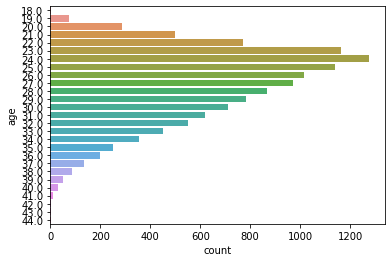

In [11]:
sns.countplot(y='age', data=nba)

# DATA SET POSTAL: VARIABLES PARA ANALIZAR

 Con este set de información se pueden detectar las tendencias, el comportamiento de los clientes o los errores en las operaciones, de esta forma poder introducir soluciones a los procesos e, incluso, detectar nuevos negocios de cara al futuro. Analizar y predecir la tendencia en los tiempos de entrega, volumen y potencial crecimiento. Con la columna fecha_hora, se puede detectar y predecir  el pico de volumen que ingresara por dia y hora. 


In [12]:
postal.shape

(86278, 50)

In [13]:
postal.head(5)

,id,cliente_id,tipo_operacion,tipo_operacion_nombre,colectora,fecha_hora,fechaplanilla,fecharendicion,fecha_hora_entrega,fechaUltimoEstado,...,origen_longitud,origen_zona,origen_region,destino_cp,destino_localidad,destino_provincia,destino_latitud,destino_longitud,destino_zona,destino_region
0,1397308,351,ENTREGA BOLSIN,NaN,1.0,1/4/2021 17:10,31/3/2021,NaN,NaN,5/4/2021 00:00,...,"-60,55883198",AMBA,CABA,2000,ROSARIO,SANTA FE,"-30,70692716","-60,94983694",INT,PAMPEANA
1,1397566,400,ENTREGA BOLSIN,NaN,1.0,1/4/2021 17:55,31/3/2021,NaN,NaN,5/4/2021 00:00,...,"-60,55883198",AMBA,CABA,2000,ROSARIO,SANTA FE,"-30,70692716","-60,94983694",INT,PAMPEANA
2,1408682,351,ENTREGA BOLSIN,NaN,1.0,6/4/2021 16:21,5/4/2021,NaN,NaN,6/4/2021 00:00,...,"-60,55883198",AMBA,CABA,2000,ROSARIO,SANTA FE,"-30,70692716","-60,94983694",INT,PAMPEANA
3,1408862,400,ENTREGA BOLSIN,NaN,1.0,6/4/2021 17:03,5/4/2021,NaN,NaN,6/4/2021 00:00,...,"-60,55883198",AMBA,CABA,2000,ROSARIO,SANTA FE,"-30,70692716","-60,94983694",INT,PAMPEANA
4,1409200,690,ENTREGA PAQUETERIA,ENTREGA,1.0,5/4/2021 17:47,5/4/2021,NaN,6/4/2021 00:00,7/4/2021 12:06,...,"-60,55883198",AMBA,CABA,2000,ROSARIO,SANTA FE,"-30,70692716","-60,94983694",INT,PAMPEANA


In [14]:
postal.columns

Index(['id', 'cliente_id', 'tipo_operacion', 'tipo_operacion_nombre',
       'colectora', 'fecha_hora', 'fechaplanilla', 'fecharendicion',
       'fecha_hora_entrega', 'fechaUltimoEstado', 'fecha_ultimo_estado',
       'servicio_codigo', 'servicio', 'grupo', 'codigo_estado', 'estado',
       'peso', 'bultos', 'bulto_por_peso_final', 'peso_volumetrico',
       'kg_exceso', 'precio', 'costo_distribuidor', 'costo_interno',
       'costo_transporte', 'costo_despacho_a_expreso',
       'costo_servicio_retorno', 'costo_por_monitoreo_activo',
       'costo_adicional1', 'costo_adicional2', 'costo_adicional3',
       'totalFlete', 'importe_urgente', 'importe_exceso', 'is_foto',
       'is_firma', 'origen_cp', 'origen_localidad', 'origen_provincia',
       'origen_latitud', 'origen_longitud', 'origen_zona', 'origen_region',
       'destino_cp', 'destino_localidad', 'destino_provincia',
       'destino_latitud', 'destino_longitud', 'destino_zona',
       'destino_region'],
      dtype='object')

In [15]:
postal['destino_provincia']= postal['destino_provincia'].replace(["Buenos Aires"], ["BUENOS AIRES"])
#modifico lo mal escrito

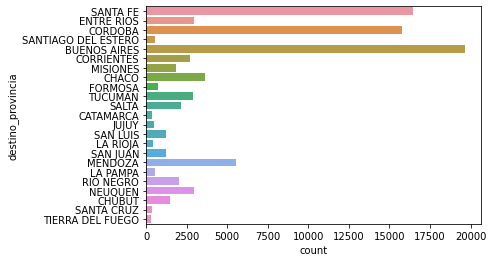

In [16]:
sns.countplot(y='destino_provincia', data=postal)